<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_2_5_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
#initial population
population = 100
genes = 100
generations = 100

pop = np.random.randint(0,2, size=(population,genes))
print(pop)

[[0 1 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 1 0 1]]


(array([ 5.,  6.,  9., 21., 16., 17., 16.,  4.,  5.,  1.]),
 array([40. , 42.3, 44.6, 46.9, 49.2, 51.5, 53.8, 56.1, 58.4, 60.7, 63. ]),
 <a list of 10 Patch objects>)

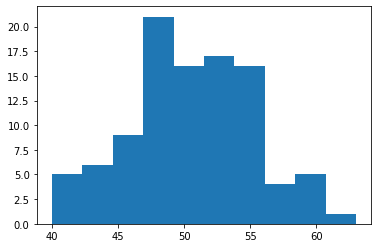

In [ ]:
fitness = np.sum(pop,axis=1)
plt.hist(fitness)

In [ ]:
def elite_selection(fitness):
  return fitness.argsort()[-2:][::-1]  

parents = elite_selection(fitness)
print(pop[parents[0]])

[0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1]


In [ ]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()  
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover    
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(pop[parents[0]],pop[parents[1]], .5)

[array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])]

In [ ]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:
      # flip the bit
      individual[i] = 1 - individual[i]
  return individual

mutation(pop[parents[0]], .5)

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
def simple_GA(pop, crossover_rate=.5, mutation_rate=.05):
  fitness = np.sum(pop,axis=1) 
  parents = elite_selection(fitness)
  children = np.zeros((population,genes))  
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)  
  return children

simple_GA(pop)

array([[1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

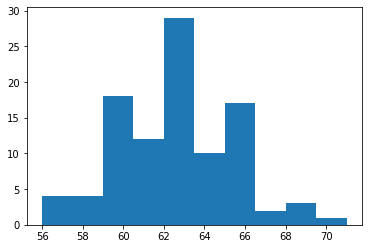

Generation 1
    Max fitness 71.0
    Min fitness 56.0
    Mean fitness 62.39
    Std fitness 2.763675089441594


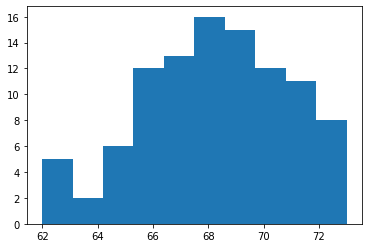

Generation 2
    Max fitness 73.0
    Min fitness 62.0
    Mean fitness 68.16
    Std fitness 2.4483463807231196


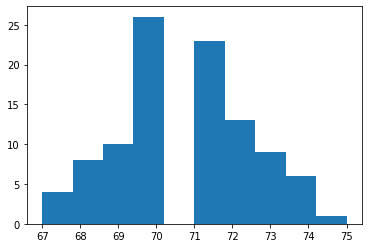

Generation 3
    Max fitness 75.0
    Min fitness 67.0
    Mean fitness 70.67
    Std fitness 1.7609940374686108


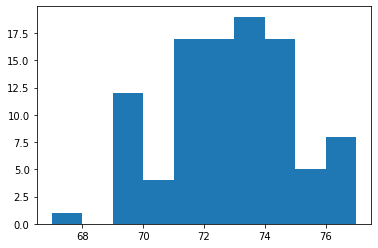

Generation 4
    Max fitness 77.0
    Min fitness 67.0
    Mean fitness 72.36
    Std fitness 2.0761502835777566


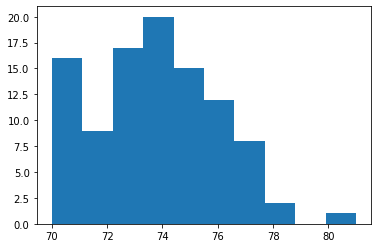

Generation 5
    Max fitness 81.0
    Min fitness 70.0
    Mean fitness 73.92
    Std fitness 2.081730049742281


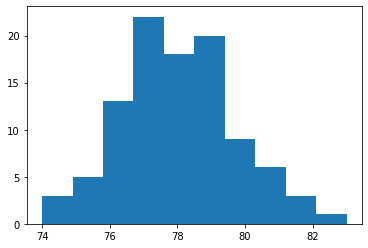

Generation 6
    Max fitness 83.0
    Min fitness 74.0
    Mean fitness 77.98
    Std fitness 1.8707217858356167


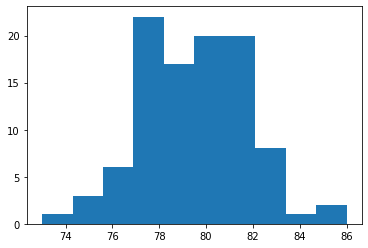

Generation 7
    Max fitness 86.0
    Min fitness 73.0
    Mean fitness 79.49
    Std fitness 2.3043220261065946


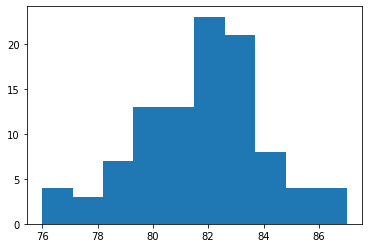

Generation 8
    Max fitness 87.0
    Min fitness 76.0
    Mean fitness 81.7
    Std fitness 2.1748563170931545


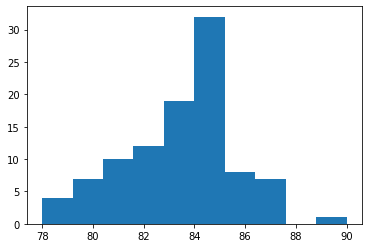

Generation 9
    Max fitness 90.0
    Min fitness 78.0
    Mean fitness 83.32
    Std fitness 2.2085289221561033


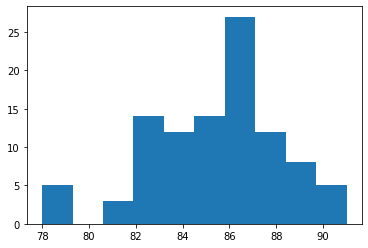

Generation 10
    Max fitness 91.0
    Min fitness 78.0
    Mean fitness 85.4
    Std fitness 2.803569153775237


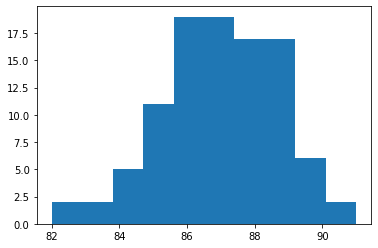

Generation 11
    Max fitness 91.0
    Min fitness 82.0
    Mean fitness 87.03
    Std fitness 1.8997631431312696


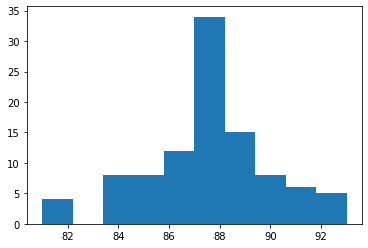

Generation 12
    Max fitness 93.0
    Min fitness 81.0
    Mean fitness 87.52
    Std fitness 2.4185946332529555


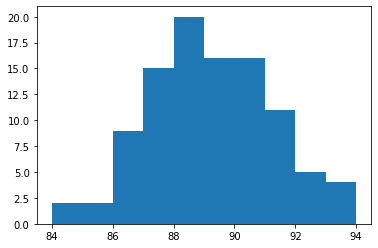

Generation 13
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 88.75
    Std fitness 2.03654118544163


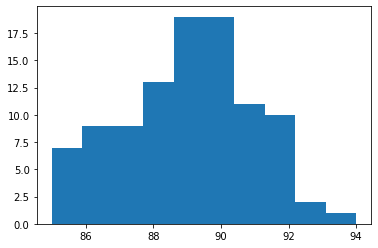

Generation 14
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 88.98
    Std fitness 2.1259350883787587


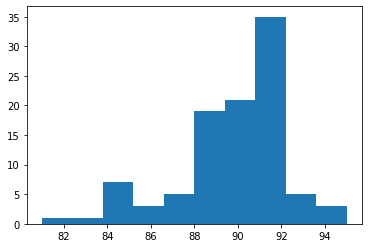

Generation 15
    Max fitness 95.0
    Min fitness 81.0
    Mean fitness 89.72
    Std fitness 2.4741867350707385


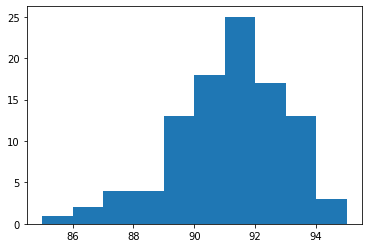

Generation 16
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.65
    Std fitness 1.8621224449536071


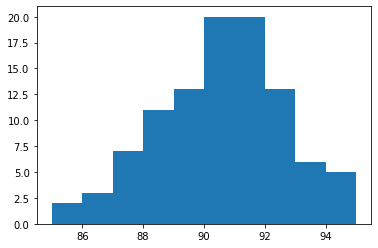

Generation 17
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.07
    Std fitness 2.0796874765214124


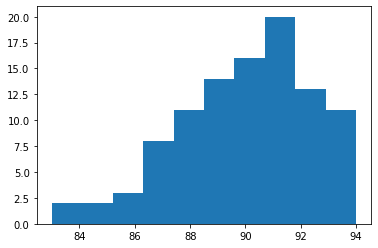

Generation 18
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.86
    Std fitness 2.227195545972558


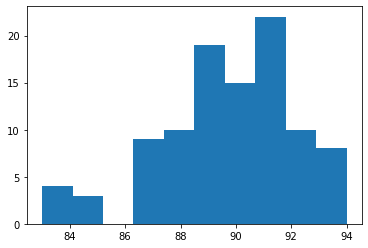

Generation 19
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.62
    Std fitness 2.2484661438411746


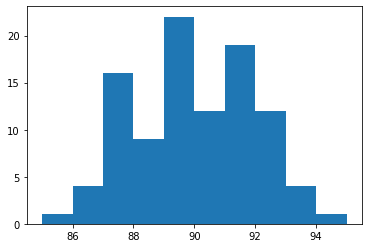

Generation 20
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 89.51
    Std fitness 1.98743553354568


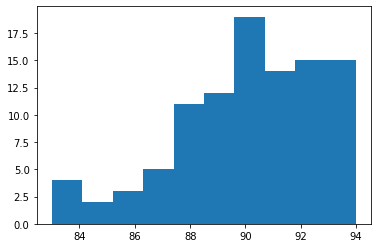

Generation 21
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.95
    Std fitness 2.446936860648431


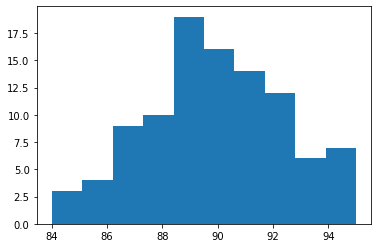

Generation 22
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 89.86
    Std fitness 2.315253765788969


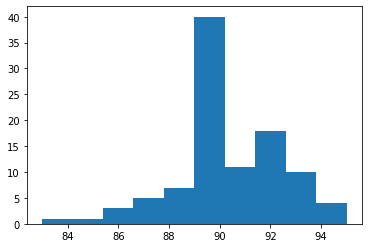

Generation 23
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.26
    Std fitness 2.1195282493989085


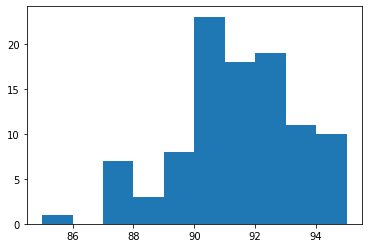

Generation 24
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.9
    Std fitness 1.9723082923316018


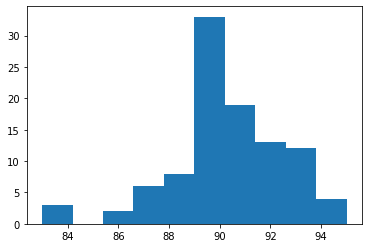

Generation 25
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.22
    Std fitness 2.260884782557484


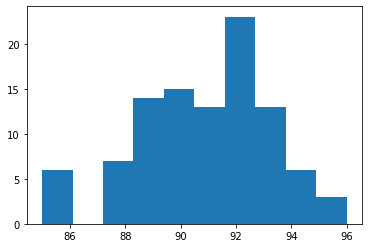

Generation 26
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.83
    Std fitness 2.2363139314505913


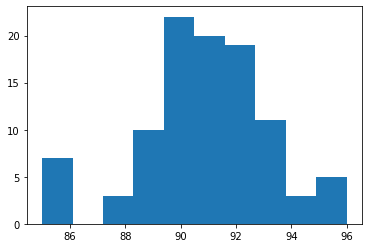

Generation 27
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.85
    Std fitness 2.146508793366568


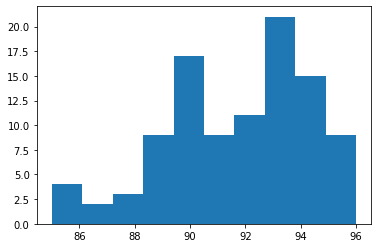

Generation 28
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.62
    Std fitness 2.3823517792299276


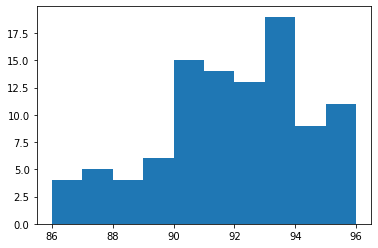

Generation 29
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 91.44
    Std fitness 2.430308622377001


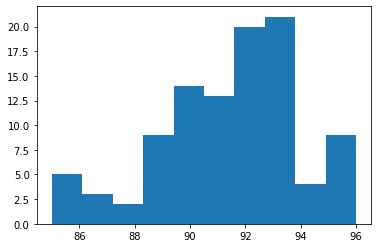

Generation 30
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.37
    Std fitness 2.343736333293487


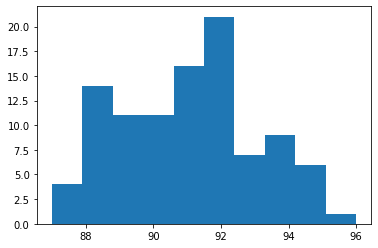

Generation 31
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 91.0
    Std fitness 2.227105745132009


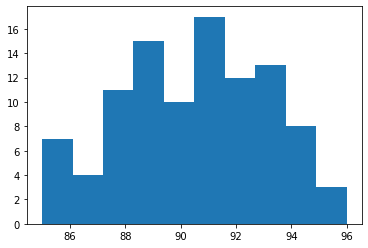

Generation 32
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.47
    Std fitness 2.4837672998894242


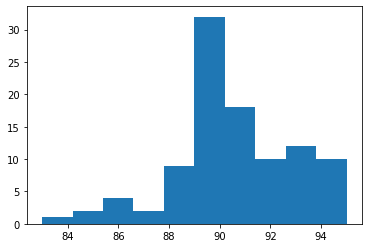

Generation 33
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.48
    Std fitness 2.3642334910071807


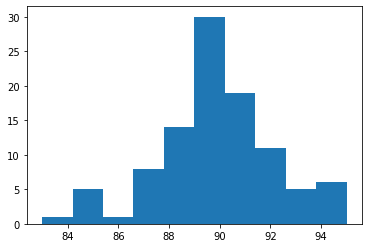

Generation 34
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 89.82
    Std fitness 2.3638104830971542


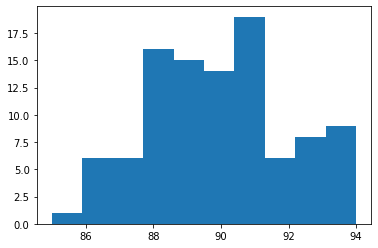

Generation 35
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 89.97
    Std fitness 2.264751642012872


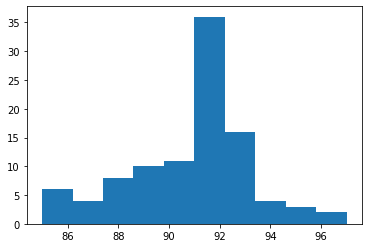

Generation 36
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 90.75
    Std fitness 2.3680160472429237


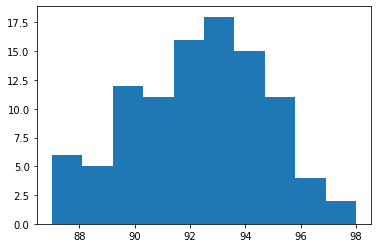

Generation 37
    Max fitness 98.0
    Min fitness 87.0
    Mean fitness 92.31
    Std fitness 2.2790129442370435


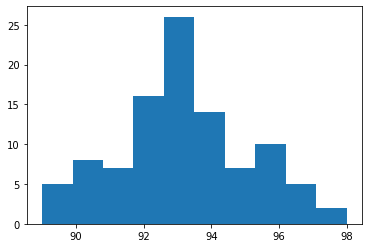

Generation 38
    Max fitness 98.0
    Min fitness 89.0
    Mean fitness 93.14
    Std fitness 2.135509306933594


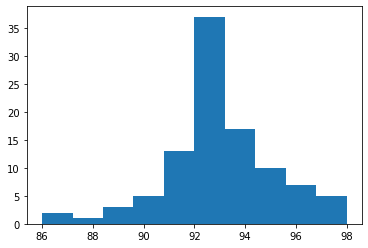

Generation 39
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 92.95
    Std fitness 2.2062411472910206


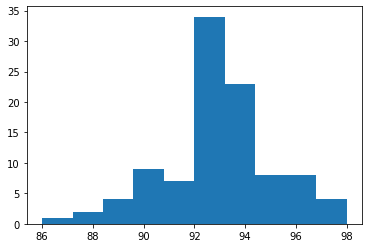

Generation 40
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 92.92
    Std fitness 2.2030887408363737


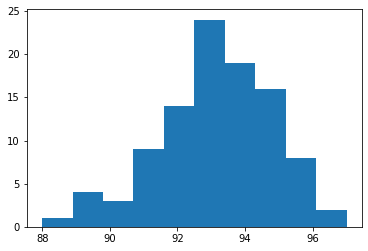

Generation 41
    Max fitness 97.0
    Min fitness 88.0
    Mean fitness 93.21
    Std fitness 1.867056506911347


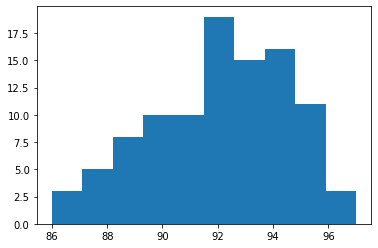

Generation 42
    Max fitness 97.0
    Min fitness 86.0
    Mean fitness 92.04
    Std fitness 2.306165648863932


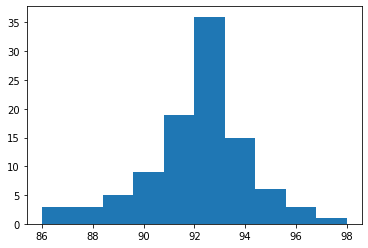

Generation 43
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 92.03
    Std fitness 2.1187496312684044


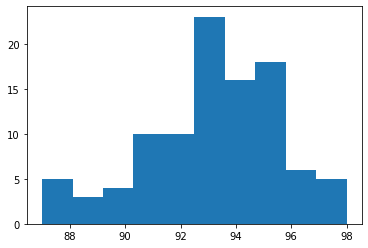

Generation 44
    Max fitness 98.0
    Min fitness 87.0
    Mean fitness 93.1
    Std fitness 2.260530911091463


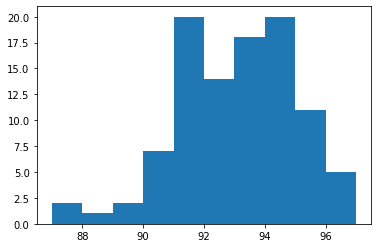

Generation 45
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.58
    Std fitness 1.9605101376937586


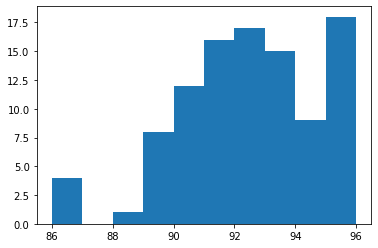

Generation 46
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 92.04
    Std fitness 2.3913176284216195


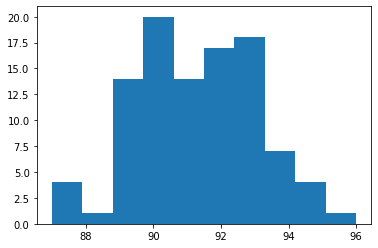

Generation 47
    Max fitness 96.0
    Min fitness 87.0
    Mean fitness 91.28
    Std fitness 1.954891301325984


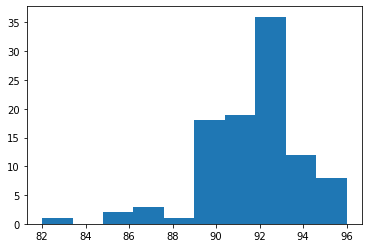

Generation 48
    Max fitness 96.0
    Min fitness 82.0
    Mean fitness 91.66
    Std fitness 2.290065501246634


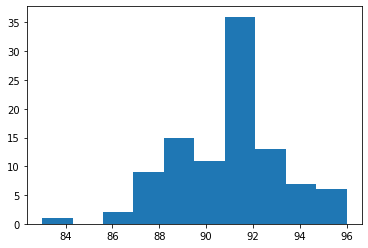

Generation 49
    Max fitness 96.0
    Min fitness 83.0
    Mean fitness 91.01
    Std fitness 2.3259191731442437


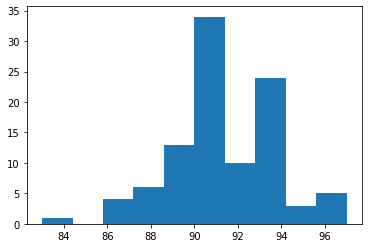

Generation 50
    Max fitness 97.0
    Min fitness 83.0
    Mean fitness 91.18
    Std fitness 2.4346663015698886


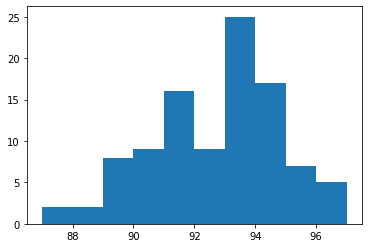

Generation 51
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.25
    Std fitness 2.108909670896314


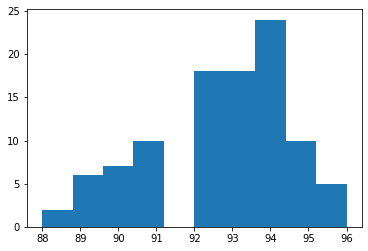

Generation 52
    Max fitness 96.0
    Min fitness 88.0
    Mean fitness 92.66
    Std fitness 1.9090311678964282


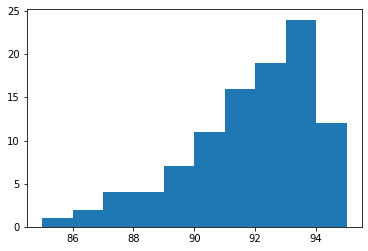

Generation 53
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 91.39
    Std fitness 2.1628453481467416


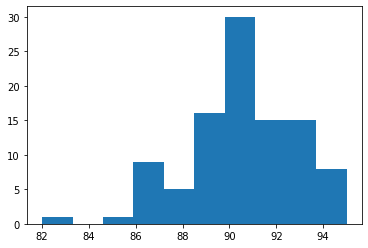

Generation 54
    Max fitness 95.0
    Min fitness 82.0
    Mean fitness 90.56
    Std fitness 2.333752343330371


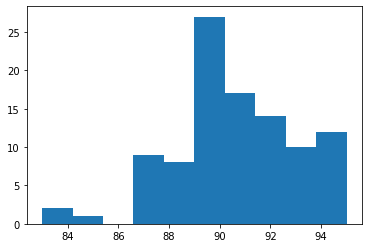

Generation 55
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.57
    Std fitness 2.4505305547982865


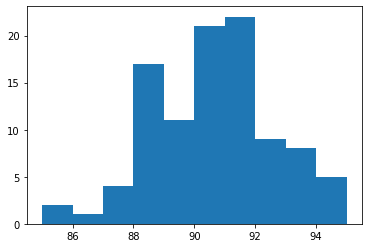

Generation 56
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.14
    Std fitness 1.9950939827486824


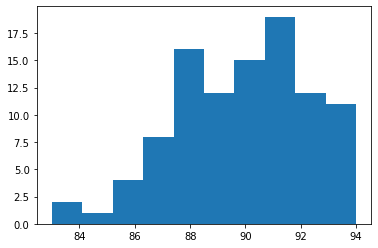

Generation 57
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.79
    Std fitness 2.2772571220659295


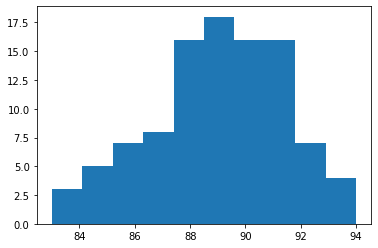

Generation 58
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 88.98
    Std fitness 2.2404463840940267


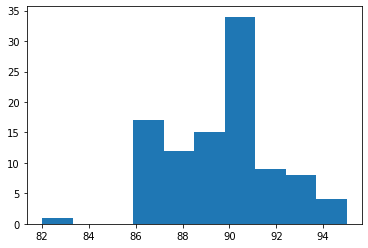

Generation 59
    Max fitness 95.0
    Min fitness 82.0
    Mean fitness 89.73
    Std fitness 2.2487996798292196


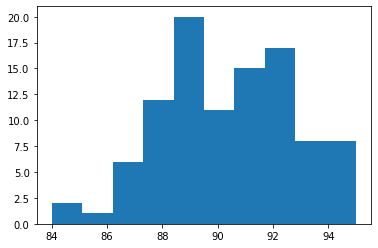

Generation 60
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 90.32
    Std fitness 2.2533530571128884


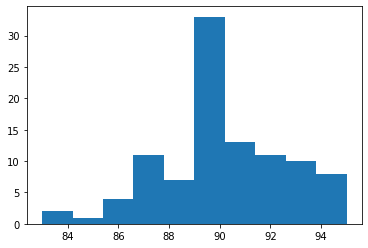

Generation 61
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.05
    Std fitness 2.4428467000612217


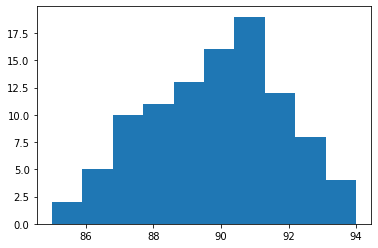

Generation 62
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 89.88
    Std fitness 2.187601426220051


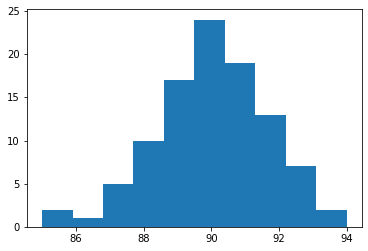

Generation 63
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 90.08
    Std fitness 1.8258148865643526


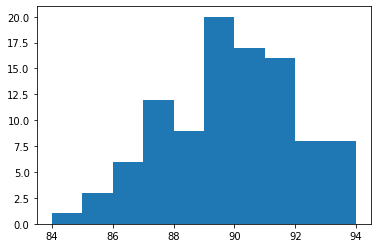

Generation 64
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.39
    Std fitness 2.162845348146742


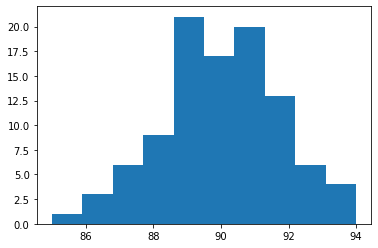

Generation 65
    Max fitness 94.0
    Min fitness 85.0
    Mean fitness 90.06
    Std fitness 1.9329769786523583


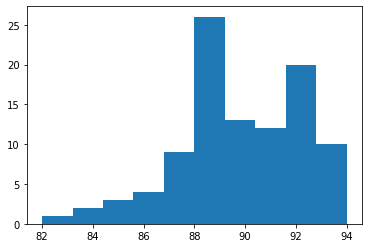

Generation 66
    Max fitness 94.0
    Min fitness 82.0
    Mean fitness 89.73
    Std fitness 2.493411317853514


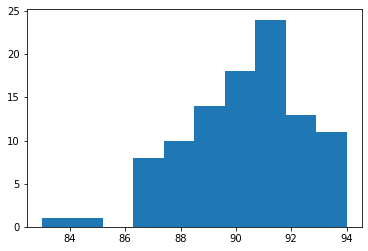

Generation 67
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 90.15
    Std fitness 1.9665960439297132


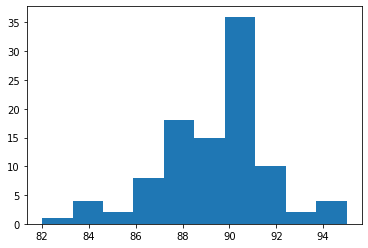

Generation 68
    Max fitness 95.0
    Min fitness 82.0
    Mean fitness 89.41
    Std fitness 2.332788031519366


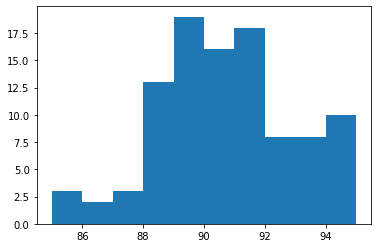

Generation 69
    Max fitness 95.0
    Min fitness 85.0
    Mean fitness 90.22
    Std fitness 2.216212986154535


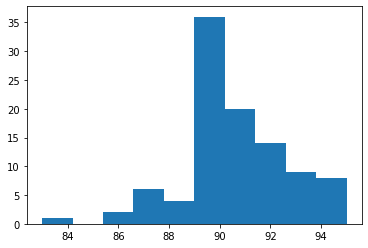

Generation 70
    Max fitness 95.0
    Min fitness 83.0
    Mean fitness 90.51
    Std fitness 2.1094786085665813


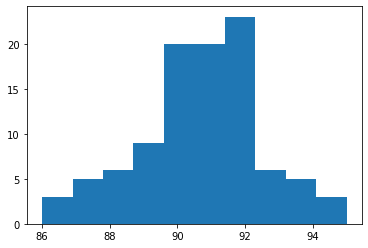

Generation 71
    Max fitness 95.0
    Min fitness 86.0
    Mean fitness 90.71
    Std fitness 1.9914567532336722


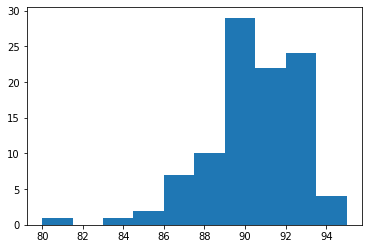

Generation 72
    Max fitness 95.0
    Min fitness 80.0
    Mean fitness 90.1
    Std fitness 2.3685438564654024


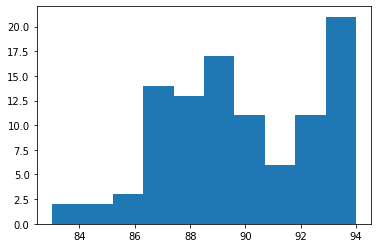

Generation 73
    Max fitness 94.0
    Min fitness 83.0
    Mean fitness 89.77
    Std fitness 2.5955924179269747


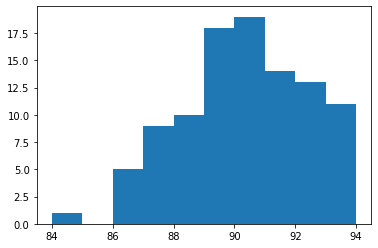

Generation 74
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.83
    Std fitness 2.0593931144878583


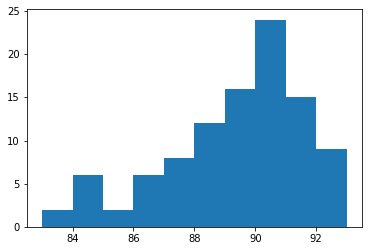

Generation 75
    Max fitness 93.0
    Min fitness 83.0
    Mean fitness 88.87
    Std fitness 2.300673814342224


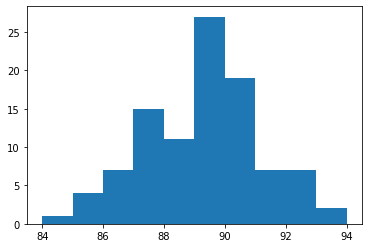

Generation 76
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 88.8
    Std fitness 1.9235384061671346


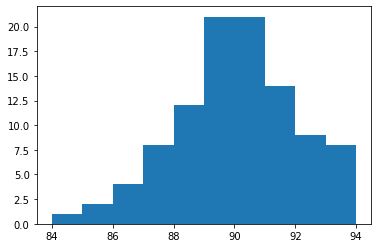

Generation 77
    Max fitness 94.0
    Min fitness 84.0
    Mean fitness 89.56
    Std fitness 2.001599360511489


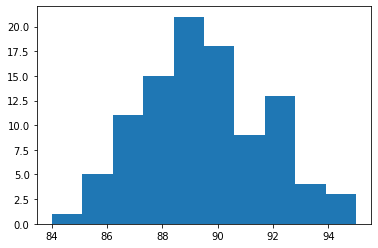

Generation 78
    Max fitness 95.0
    Min fitness 84.0
    Mean fitness 89.5
    Std fitness 2.0615528128088303


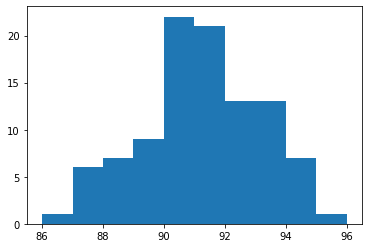

Generation 79
    Max fitness 96.0
    Min fitness 86.0
    Mean fitness 90.75
    Std fitness 1.9716744153130354


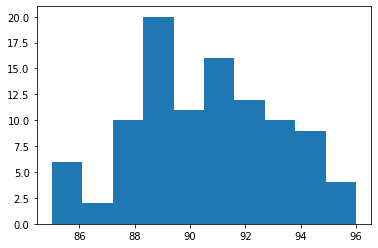

Generation 80
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 90.56
    Std fitness 2.3677837739117984


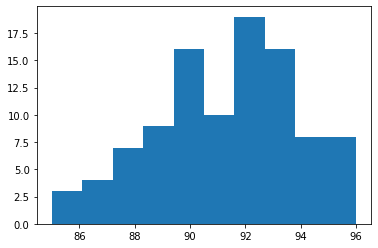

Generation 81
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.21
    Std fitness 2.350723292946237


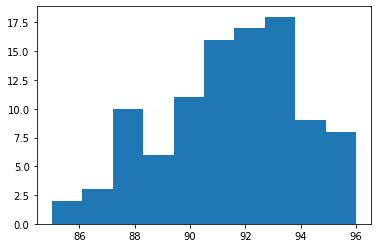

Generation 82
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.37
    Std fitness 2.296323147991153


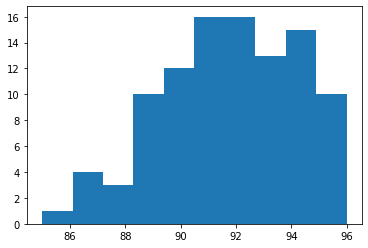

Generation 83
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.65
    Std fitness 2.2555487137279924


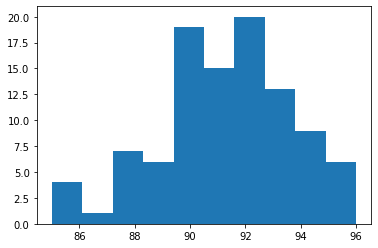

Generation 84
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.21
    Std fitness 2.2058785098005735


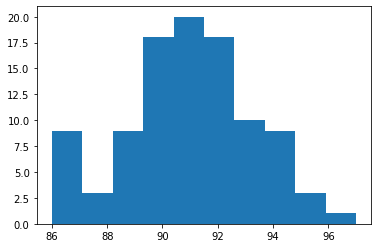

Generation 85
    Max fitness 97.0
    Min fitness 86.0
    Mean fitness 90.98
    Std fitness 2.1999090890307262


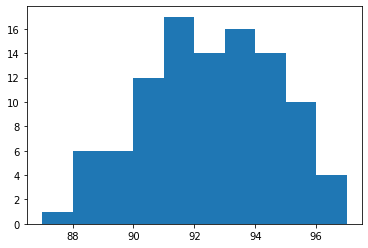

Generation 86
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.03
    Std fitness 2.1792429878285717


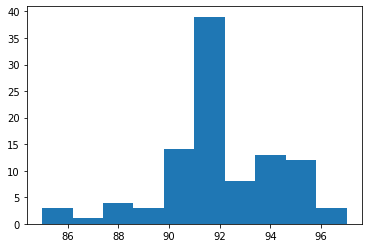

Generation 87
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 91.85
    Std fitness 2.316786567640619


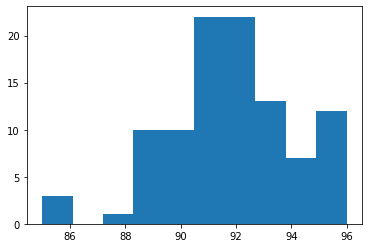

Generation 88
    Max fitness 96.0
    Min fitness 85.0
    Mean fitness 91.73
    Std fitness 2.1580315104279637


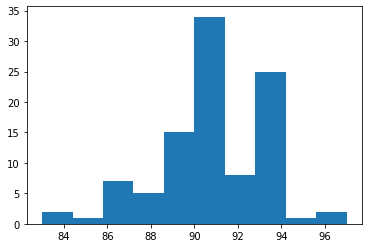

Generation 89
    Max fitness 97.0
    Min fitness 83.0
    Mean fitness 90.73
    Std fitness 2.5094023192784376


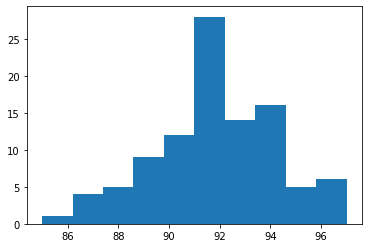

Generation 90
    Max fitness 97.0
    Min fitness 85.0
    Mean fitness 91.71
    Std fitness 2.4588411904797756


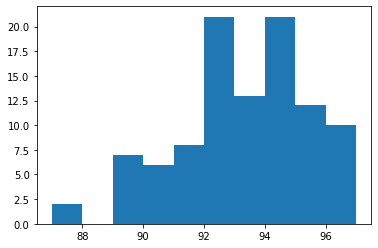

Generation 91
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.82
    Std fitness 2.1465320868787403


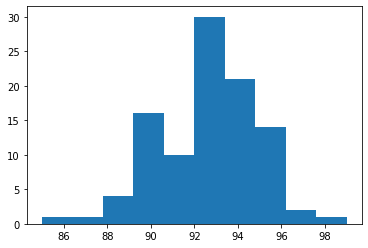

Generation 92
    Max fitness 99.0
    Min fitness 85.0
    Mean fitness 92.55
    Std fitness 2.3124662159694354


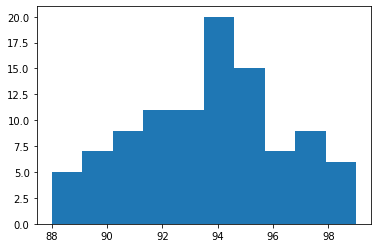

Generation 93
    Max fitness 99.0
    Min fitness 88.0
    Mean fitness 93.66
    Std fitness 2.474752512878813


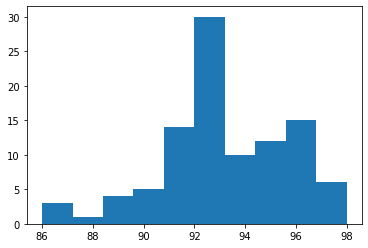

Generation 94
    Max fitness 98.0
    Min fitness 86.0
    Mean fitness 93.08
    Std fitness 2.492709369340919


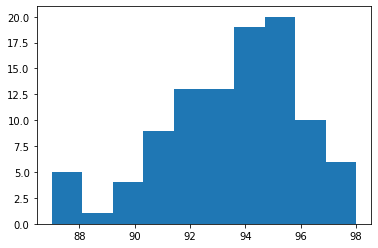

Generation 95
    Max fitness 98.0
    Min fitness 87.0
    Mean fitness 93.41
    Std fitness 2.354124040912033


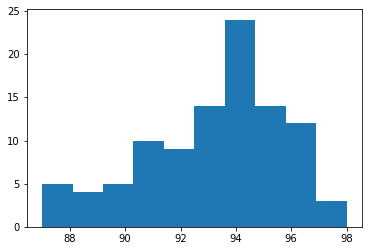

Generation 96
    Max fitness 98.0
    Min fitness 87.0
    Mean fitness 93.15
    Std fitness 2.3167865676406185


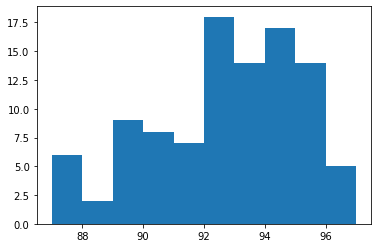

Generation 97
    Max fitness 97.0
    Min fitness 87.0
    Mean fitness 92.23
    Std fitness 2.436616506551657


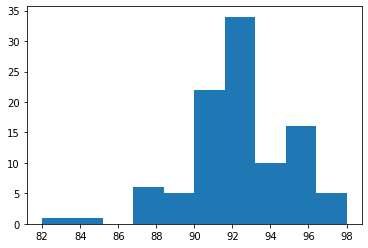

Generation 98
    Max fitness 98.0
    Min fitness 82.0
    Mean fitness 92.32
    Std fitness 2.671628716719447


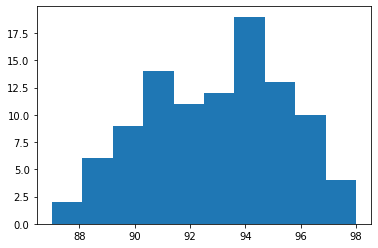

Generation 99
    Max fitness 98.0
    Min fitness 87.0
    Mean fitness 92.92
    Std fitness 2.3395726105423615


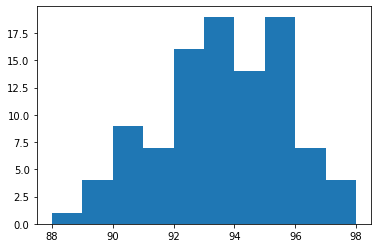

Generation 100
    Max fitness 98.0
    Min fitness 88.0
    Mean fitness 93.13
    Std fitness 2.114970448966132


In [ ]:
#initial population
pop = np.random.randint(0,2, size=(population,genes))

for i in range(generations):
  pop = simple_GA(pop)
  fitness = np.sum(pop,axis=1)
  plt.hist(fitness)
  plt.show()
  print(f"Generation {i+1}")
  print(f"    Max fitness {np.max(fitness)}")
  print(f"    Min fitness {np.min(fitness)}")
  print(f"    Mean fitness {np.mean(fitness)}")
  print(f"    Std fitness {np.std(fitness)}")